In [59]:
import os
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd

In [60]:
import seaborn as sns

In [2]:
import nltk

# Read Data

In [3]:
# f = open("hw4_train.txt", "r")
# #print(f.read()) # reads the whole file at once

In [4]:
# for i, line in enumerate(f):
#     # Start from line 3 (index 2)  # Not necessarily
#     if i >= 2 and i < 15:
#         print (f"{i}: {line}")
#         # print(f.readline())        

In [5]:
# Reading the data takes a long time, so this is a workaround if data has already been read once and saved in a pandas dataframe
# Change to 1 if running for the 1st time, then for subsequent runs, you can choose to change this to 0
REREAD = 0

In [6]:
if REREAD:
    f = open("hw4_train.txt", "r")
    #print(f.read()) # reads the whole file at once

    data = np.empty((0,2))

    sentence = []
    labels = []
    for i, line in enumerate(f):
        if line != "\n":
            words = line.split()
            word = words[0]
            label = words[3]
            # print (f"{i}: {line} --> Word = {word}: Target = {label}")
            sentence.append(word)
            labels.append(label)
            # print(f.readline())    
        else:
            sentence = " ".join(sentence)
            labels = " ".join(labels)
            data = np.vstack((data,[sentence,labels]))
            sentence = [] # reset sentence
            labels = [] # reset lables

    f.close() 

In [7]:
if REREAD:
    data = pd.DataFrame(data)
    data.columns = ['sentence', 'NER']
    data.info()

In [8]:
if REREAD:
    # Save the data
    data.to_csv("hw4_reformatted.csv", index=False)     

In [9]:
if not REREAD:
    # Read the data already saved
    data = pd.read_csv("hw4_reformatted.csv")
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14987 entries, 0 to 14986
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  14987 non-null  object
 1   NER       14987 non-null  object
dtypes: object(2)
memory usage: 234.3+ KB


In [10]:
data.head()

,sentence,NER
0,-DOCSTART-,O
1,EU rejects German call to boycott British lamb .,B-ORG O B-MISC O O O B-MISC O O
2,Peter Blackburn,B-PER I-PER
3,BRUSSELS 1996-08-22,B-LOC O
4,The European Commission said on Thursday it di...,O B-ORG I-ORG O O O O O O B-MISC O O O O O B-M...


In [11]:
data.tail()

,sentence,NER
14982,on Friday :,O O O
14983,Division two,O O
14984,Plymouth 2 Preston 1,B-ORG O B-ORG O
14985,Division three,O O
14986,Swansea 1 Lincoln 2,B-ORG O B-ORG O


# Build Dictionaries

In [12]:
#Text Preprocessing
# Lower string
data['sentence'] = data['sentence'].str.lower()

In [13]:
data.head()

,sentence,NER
0,-docstart-,O
1,eu rejects german call to boycott british lamb .,B-ORG O B-MISC O O O B-MISC O O
2,peter blackburn,B-PER I-PER
3,brussels 1996-08-22,B-LOC O
4,the european commission said on thursday it di...,O B-ORG I-ORG O O O O O O B-MISC O O O O O B-M...


## Tokenize

Do not tokenize here since that may lead to more tokens than labels in a sentence. 


In [14]:
# import nltk
# from nltk.tokenize import word_tokenize

In [15]:
# df_ = pd.DataFrame(columns=data.columns)

# for index, row in data.iterrows():
#     word_tokens = word_tokenize(row['sentence'])
#     #filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
#     filtered_sentence = [w for w in word_tokens]
#     df_ = df_.append({"NER":  row['NER'], "sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)

# data = df_

In [16]:
# data.head()

In [17]:
# for index, row in data.iterrows():
#     if len(data.iloc[index]['sentence'].split()) != len(data.iloc[index]['NER'].split()):
#         print(f"Index {index} did not match")
#         break

In [18]:
# print(len(data.iloc[66]['sentence'].split()))
# print(len(data.iloc[66]['NER'].split()))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data['sentence'].values.astype('U'),
    data['NER'],  # .values.astype('int32'),
    test_size=0.20,
    random_state=42
)

print(f"Number of samples: X_train: {len(X_train)}, y_train: {len(y_train)}")
print(f"Number of samples: X_test: {len(X_test)}, y_test: {len(y_test)}")

Number of samples: X_train: 11989, y_train: 11989
Number of samples: X_test: 2998, y_test: 2998


## Vocabulary

In [21]:
corpus = []
for _, row in enumerate(X_train):
  corpus = corpus + row.split(" ")

In [22]:
X_train[:2]

array(['wednesday , august 28th schedule', 'toronto 58 69 .457 15'],
      dtype='<U512')

In [23]:
print(corpus[:15])

['wednesday', ',', 'august', '28th', 'schedule', 'toronto', '58', '69', '.457', '15', '-docstart-', 'two', 'key', 'players', 'left']


In [24]:
# Get only words that have occured more than a certain threshold to remove noise, spelling mistakes and possible tokenization errors (if done).
fdist = nltk.FreqDist(corpus)
print(fdist.most_common()[:20])
vocab = [word for word, count in fdist.most_common() if count >= 1]
print(vocab[:20])

[('the', 6624), ('.', 5848), (',', 5812), ('of', 3062), ('in', 2876), ('to', 2721), ('a', 2529), (')', 2315), ('(', 2314), ('and', 2279), ('"', 1755), ('on', 1654), ('said', 1473), ("'s", 1248), ('for', 1171), ('1', 1125), ('-', 1021), ('at', 921), ('was', 870), ('2', 781)]
['the', '.', ',', 'of', 'in', 'to', 'a', ')', '(', 'and', '"', 'on', 'said', "'s", 'for', '1', '-', 'at', 'was', '2']


In [25]:
len(vocab)

18804

### Encoding and Decoding Dictionary

In [26]:
word_index = {}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
for index, word in enumerate(vocab):
  word_index[word] = index+3

In [27]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
[(i, reverse_word_index.get(i)) for i in np.arange(10)]

[(0, '<PAD>'),
 (1, '<START>'),
 (2, '<UNK>'),
 (3, 'the'),
 (4, '.'),
 (5, ','),
 (6, 'of'),
 (7, 'in'),
 (8, 'to'),
 (9, 'a')]

In [28]:
vocabulary_size = len(word_index.keys())
vocabulary_size

18807

In [29]:
def encode(plain_text: str, word2index: Dict[str, int]) -> List[int]:
  """
  Encodes the plain text as per the word2index doctionary
  :param plain_text: The text to be encoded
  :param word2index: The Encoder dictionary
  """
  return [word2index[token] if token in word2index.keys() else word2index["<UNK>"] for token in plain_text.split(" ")]

def decode(encoded_text, index2word: Dict[int, str]):
  """
  Decodes the encoded text as per the index2word doctionary
  :param encoded_text: The encoded text that is to be decoded
  :param index2word: The decoder dictionary
  """
  return ' '.join([index2word.get(i, '?') for i in encoded_text])

In [30]:
def encode_decode_check(original: str, word2index: Dict[str, int], index2word: Dict[int, str]):
  """
  :param original: The text to be checked for encoding and decoding
  :param word2index: The Encoder dictionary
  :param index2word: The decoder dictionary
  """
  print("\n")
  print(f"Original: {original}")
  encoded = encode(original, word2index)
  print(f"Encoded: {encoded}")
  decoded = decode(encoded, index2word)
  print(f"Decoded: {decoded}")
  same = decoded == original
  print(f"Decoded = Original: {same}")

**Observations:**

Train Reviews and test reviews have UNK tokens introduced for words not in the vocabulary, but apart from this, they match up.

In [31]:
random_train_data = X_train[np.random.choice(len(X_train), 5)]
random_train_data

for data_row in random_train_data:
  encode_decode_check(data_row, word2index=word_index, index2word=reverse_word_index)



Original: 8. bart voskamp ( netherlands ) tvm 53
Encoded: [417, 15345, 15346, 11, 266, 10, 3845, 942]
Decoded: 8. bart voskamp ( netherlands ) tvm 53
Decoded = Original: True


Original: it was not clear if they were the same five spy rings , allegedly led by turkish diplomats , that iran said in april it had broken up in the same area , which borders turkey .
Encoded: [28, 21, 37, 817, 148, 51, 43, 3, 344, 149, 9220, 8016, 5, 3189, 763, 31, 867, 1162, 5, 29, 888, 15, 7, 795, 28, 38, 1525, 62, 7, 3, 344, 489, 5, 61, 3924, 784, 4]
Decoded: it was not clear if they were the same five spy rings , allegedly led by turkish diplomats , that iran said in april it had broken up in the same area , which borders turkey .
Decoded = Original: True


Original: -docstart-
Encoded: [23]
Decoded: -docstart-
Decoded = Original: True


Original: will go to ( jerusalem 's ) al-aqsa mosque and pray .
Encoded: [49, 316, 8, 11, 549, 16, 10, 17290, 8340, 12, 6217, 4]
Decoded: will go to ( jerusalem 's ) al

In [32]:
random_test_data = X_test[np.random.choice(len(X_test), 5)]
random_test_data

for data_row in random_test_data:
  encode_decode_check(data_row, word2index=word_index, index2word=reverse_word_index)



Original: sint truiden 3 ekeren 1
Encoded: [11001, 11002, 25, 14466, 18]
Decoded: sint truiden 3 ekeren 1
Decoded = Original: True


Original: -docstart-
Encoded: [23]
Decoded: -docstart-
Decoded = Original: True


Original: tim belcher ( 12-8 ) was tagged for six runs and nine hits in eight innings .
Encoded: [1436, 2, 11, 2, 10, 21, 2, 17, 146, 425, 12, 534, 659, 7, 337, 286, 4]
Decoded: tim <UNK> ( <UNK> ) was <UNK> for six runs and nine hits in eight innings .
Decoded = Original: False


Original: in detroit , brad ausmus 's three-run homer capped a four-run eighth and lifted the tigers to a 7-4 victory over the reeling chicago white sox .
Encoded: [7, 853, 5, 4743, 2, 16, 5241, 1135, 3704, 9, 2, 2054, 12, 2773, 3, 1571, 8, 9, 1075, 418, 72, 3, 10393, 215, 474, 1958, 4]
Decoded: in detroit , brad <UNK> 's three-run homer capped a <UNK> eighth and lifted the tigers to a 7-4 victory over the reeling chicago white sox .
Decoded = Original: False


Original: pedro diniz ( brazil ) 1


In [33]:
X_train_encoded = [encode(data_row, word2index=word_index) for data_row in X_train]
X_test_encoded = [encode(data_row, word2index=word_index) for data_row in X_test]

In [34]:
print(X_train[:2])
print(X_train_encoded[:2])

['wednesday , august 28th schedule' 'toronto 58 69 .457 15']
[[75, 5, 163, 3243, 944], [481, 900, 227, 3901, 152]]


In [35]:
print(X_test[:2])
print(X_test_encoded[:2])

['press digest - sri lankan newspapers - august 27 .'
 "the spla has fought khartoum 's government forces in the south since 1983 for greater autonomy or independence of the mainly christian and animist region from the moslem , arabised north ."]
[[382, 1218, 19, 419, 2324, 1604, 19, 163, 702, 4], [3, 3021, 36, 2768, 1545, 16, 77, 551, 7, 3, 118, 164, 8273, 17, 4873, 3947, 97, 788, 6, 3, 4746, 1978, 12, 2, 631, 30, 3, 936, 5, 2, 306, 4]]


### Labels

In [36]:
labels = []
for _, row in enumerate(data['NER'].values):
  labels = labels + row.split(" ")

In [37]:
print(labels[:15])

['O', 'B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'B-PER', 'I-PER', 'B-LOC', 'O', 'O']


In [38]:
fdist = nltk.FreqDist(labels)
print(fdist.most_common())
label_vocab = [word for word, count in fdist.most_common()]
print(label_vocab)

[('O', 170524), ('B-LOC', 7140), ('B-PER', 6600), ('B-ORG', 6321), ('I-PER', 4528), ('I-ORG', 3704), ('B-MISC', 3438), ('I-LOC', 1157), ('I-MISC', 1155)]
['O', 'B-LOC', 'B-PER', 'B-ORG', 'I-PER', 'I-ORG', 'B-MISC', 'I-LOC', 'I-MISC']


In [39]:
label_vocab_len = len(label_vocab)
label_vocab_len

9

In [40]:
label_index = {}
for index, label in enumerate(label_vocab):
  label_index[label] = index

label_index['<PAD>'] = index+1
label_vocab_len = label_vocab_len + 1

In [41]:
reverse_label_index = dict([(value, key) for (key, value) in label_index.items()])
[(i, reverse_label_index.get(i)) for i in np.arange(label_vocab_len)]

[(0, 'O'),
 (1, 'B-LOC'),
 (2, 'B-PER'),
 (3, 'B-ORG'),
 (4, 'I-PER'),
 (5, 'I-ORG'),
 (6, 'B-MISC'),
 (7, 'I-LOC'),
 (8, 'I-MISC'),
 (9, '<PAD>')]

In [42]:
y_train_encoded = [encode(label_row, word2index=label_index) for label_row in y_train]
y_test_encoded = [encode(label_row, word2index=label_index) for label_row in y_test]

In [43]:
print(y_train[:2])
print(y_train_encoded[:2])

11112        O O O O O
820      B-ORG O O O O
Name: NER, dtype: object
[[0, 0, 0, 0, 0], [3, 0, 0, 0, 0]]


In [44]:
print(y_test[:2])
print(y_test_encoded[:2])

10005                        O O O B-MISC I-MISC O O O O O
9470     O B-ORG O O B-LOC O O O O O O O O O O O O O O ...
Name: NER, dtype: object
[[0, 0, 0, 6, 8, 0, 0, 0, 0, 0], [0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 0, 1, 7, 0]]


# Check Distribution of labels

In [45]:
#https://www.geeksforgeeks.org/python-count-the-sublists-containing-given-element-in-a-list/
def countList(lst, x): 
    return sum(x in item for item in lst) 

In [64]:
def label_distribution(labels):
    total = 0
    label_count = np.zeros((0, 2))
    for key in reverse_label_index.keys():
        count = countList(labels, key)
        label_count = np.vstack((label_count,[key, count]))
        
    label_count = np.append(label_count, (label_count[:,1]/sum(label_count[:,1]) * 100).reshape(-1,1), axis=1)
    label_count = pd.DataFrame(label_count)
    label_count.columns = ['label', 'count', 'percentage']
    label_count['label'] = label_count['label'].astype(int)
    return label_count

In [61]:
train_label_dist = label_distribution(y_train_encoded)
train_label_dist['dataset'] = 'Train'
# train_label_dist

In [62]:
test_label_dist = label_distribution(y_test_encoded)
test_label_dist['dataset'] = 'Test'
# test_label_dist

In [65]:
label_dist = pd.concat([train_label_dist, test_label_dist])
label_dist

,label,count,percentage,dataset
0,0,11772.0,38.500785,Train
1,1,4124.0,13.487703,Train
2,2,3465.0,11.332418,Train
3,3,3709.0,12.130429,Train
4,4,2334.0,7.633438,Train
5,5,1687.0,5.517399,Train
6,6,2119.0,6.930272,Train
7,7,747.0,2.443093,Train
8,8,619.0,2.024464,Train
9,9,0.0,0.000000,Train


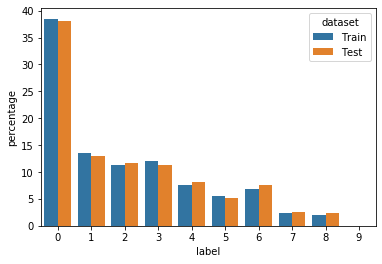

In [58]:
ax = sns.barplot(x="label", y="percentage", hue="dataset", data=label_dist)

**Observations:**

* Roughly the same distribution across the train and test set

# Train the models

1. Find max sequence length as before
2. Zero pad (see if you want to repeat above with zero padding or not)
3. Train the model